# Task L16
## Import the required libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style

In [13]:
sns.set(style="whitegrid")

# ==== 1. Create balanced dataset ====

In [15]:
data = {
    'user_id': [
        1,1,1,2,2,3,3,3,4,4,
        5,5,5,6,6,6,7,7,7,8,
        8,8,9,9,9,10,10,10,11,11,
        12,12,12,13,13,13,14,14,14,15,
        15,15,16,16,16,17,17,17,18,18
    ],
    'movie_id': [
        101,102,103,101,104,102,105,106,101,103,
        103,104,105,105,106,108,103,104,109,101,
        102,108,105,107,110,106,110,103,107,109,
        101,102,109,102,103,110,104,108,105,106,
        101,103,107,109,102,108,104,106,107,108
    ],
    'rating': [
        4,5,4,5,3,4,4,5,5,4,
        5,4,3,4,4,4,5,4,3,5,
        5,4,4,2,5,3,4,5,3,5,
        3,2,4,4,5,5,5,3,5,4,
        4,3,3,4,5,5,5,3,4,4
    ]
}

df = pd.DataFrame(data)

# ==== 2. Map movie titles ====

In [16]:
movie_titles = {
    101: "Inception",
    102: "The Matrix",
    103: "Interstellar",
    104: "The Godfather",
    105: "Forrest Gump",
    106: "Pulp Fiction",
    107: "Shawshank Redemption",
    108: "Fight Club",
    109: "The Dark Knight",
    110: "Parasite"
}
df['title'] = df['movie_id'].map(movie_titles)

# ==== 3. Movie statistics ====

In [17]:
movie_stats = df.groupby(['movie_id', 'title']).agg(
    mean_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

# ==== 4. Top popular movies ====

In [19]:
top_popular = movie_stats.sort_values('rating_count', ascending=False).head(7)
print("Top Most Rated Movies:")
print(top_popular)

Top Most Rated Movies:
   movie_id          title  mean_rating  rating_count
2       103   Interstellar     4.428571             7
0       101      Inception     4.333333             6
1       102     The Matrix     4.166667             6
3       104  The Godfather     4.200000             5
4       105   Forrest Gump     4.000000             5
5       106   Pulp Fiction     3.800000             5
7       108     Fight Club     4.000000             5


# ==== 5. Top rated movies (≥5 ratings) ====

In [22]:
top_rated = movie_stats[movie_stats['rating_count'] >= 5]\
    .sort_values('mean_rating', ascending=False).head(7)
print("\nTop Rated Movies (Min. 5 Ratings):")
print(top_rated)


Top Rated Movies (Min. 5 Ratings):
   movie_id          title  mean_rating  rating_count
2       103   Interstellar     4.428571             7
0       101      Inception     4.333333             6
3       104  The Godfather     4.200000             5
1       102     The Matrix     4.166667             6
4       105   Forrest Gump     4.000000             5
7       108     Fight Club     4.000000             5
5       106   Pulp Fiction     3.800000             5


# ==== 6. Plot: Most rated ====

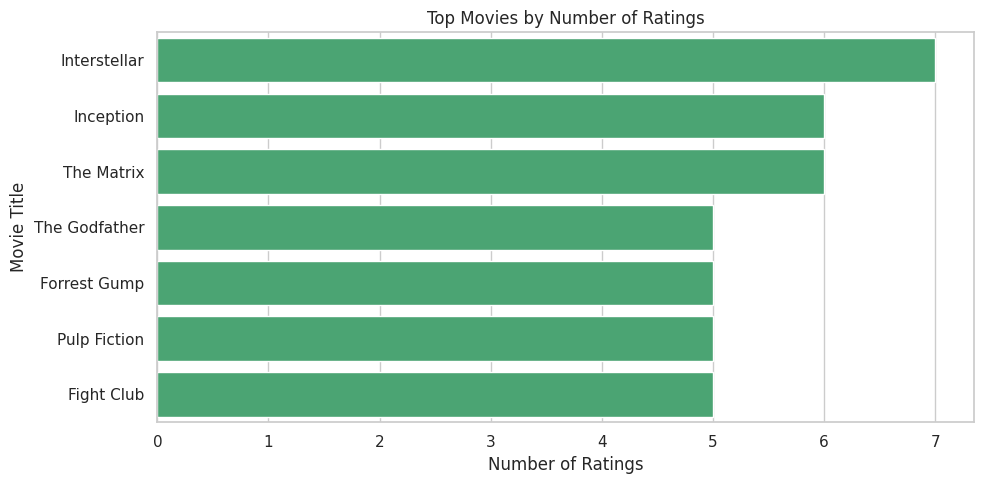

In [25]:
plt.figure(figsize=(10, 5))
# Removed palette to avoid FutureWarning, added color manually
sns.barplot(data=top_popular, x='rating_count', y='title', color='mediumseagreen')
plt.title("Top Movies by Number of Ratings")  # Removed emoji to avoid font warning
plt.xlabel("Number of Ratings")
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()


🌟 Top Rated Movies (Min. 5 Ratings):
   movie_id          title  mean_rating  rating_count
2       103   Interstellar     4.428571             7
0       101      Inception     4.333333             6
3       104  The Godfather     4.200000             5
1       102     The Matrix     4.166667             6
4       105   Forrest Gump     4.000000             5
7       108     Fight Club     4.000000             5
5       106   Pulp Fiction     3.800000             5


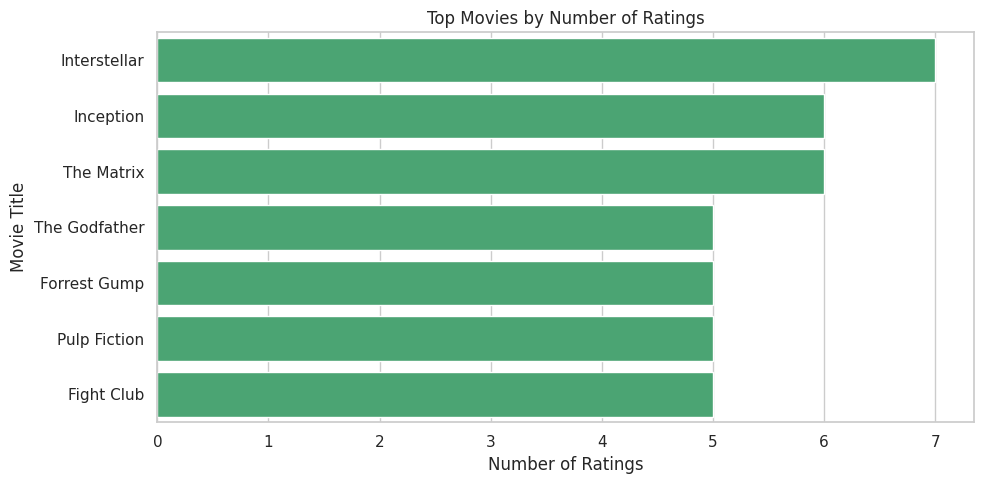

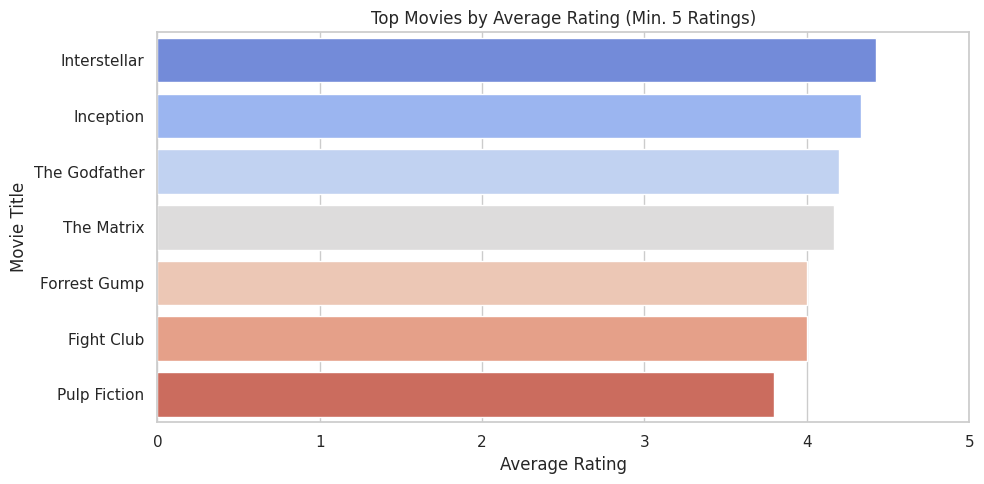

In [20]:


# ==== 7. Plot: Highest rated ====
plt.figure(figsize=(10, 5))
# Added hue to fix FutureWarning; hue='title' with legend=False disables legend
sns.barplot(data=top_rated, x='mean_rating', y='title', palette='coolwarm', hue='title', legend=False)
plt.title("Top Movies by Average Rating (Min. 5 Ratings)")  # No emoji here too
plt.xlabel("Average Rating")
plt.xlim(0, 5)
plt.ylabel("Movie Title")
plt.tight_layout()
plt.show()
